In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # 이미지
import seaborn as sns # 통계형 이미지
import FinanceDataReader as fdr

In [2]:
plt.rc("font",family="Malgun Gothic")

In [3]:
# 서울시에서 코로나 확진자 발표 들고와서 임의로 끊고 있는 답안지와 맞아야함.
covid19 = pd.read_csv("../data/seoul_covid19.csv")
covid19

C:\Users\SW\AppData\Local\Temp\ipykernel_1108\2557537514.py:1: DtypeWarning: Columns (4,10) have mixed types. Specify dtype option on import or set low_memory=False.
  covid19 = pd.read_csv("../data/seoul_covid19.csv")


,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,182558,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1,182557,2021-12-11,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
2,182556,2021-12-11,NaN,NaN,NaN,중구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
3,182555,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
4,182554,2021-12-11,NaN,NaN,NaN,광진구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182553,5,2020-01-31,9.0,NaN,650909-1,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182554,4,2020-01-30,7.0,NaN,561220-1,마포구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182555,3,2020-01-30,6.0,NaN,810212-1,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
182556,2,2020-01-30,5.0,NaN,400415-1,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y


<Axes: xlabel='확진일'>

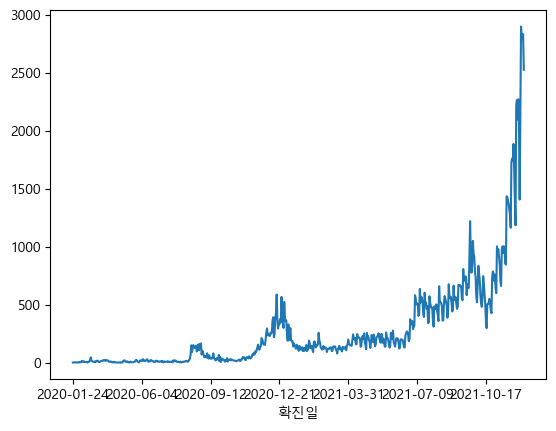

In [4]:
covid19.groupby("확진일")["연번"].count().plot()

<Axes: xlabel='확진일'>

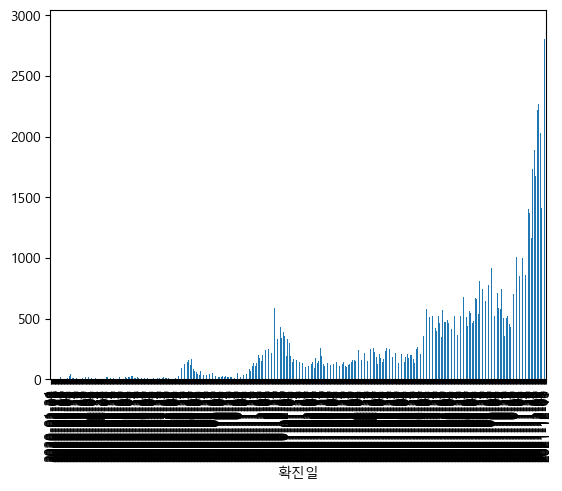

In [6]:
covid19.groupby("확진일")["연번"].count().plot(kind="bar")

In [7]:
covid19["지역"].unique()

array(['기타', '성북구', '중구', '광진구', '종로구', '중랑구', '강동구', '강북구', '노원구',
       '서대문구', '금천구', '송파구', '은평구', '성동구', '동작구', '양천구', '관악구', '구로구',
       '용산구', '강남구', '도봉구', '동대문구', '서초구', '강서구', '마포구', '영등포구', '타시도',
       '송파구 ', '서초구 ', '송파', '관악구 ', '동대문', '영등포', '서대문', '마포구 '],
      dtype=object)

In [8]:
covid19.loc[covid19["지역"]=="관악구 "]

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
1428,181130,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1464,181094,2021-12-11,NaN,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1774,180784,2021-12-11,NaN,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
12155,170403,2021-12-07,NaN,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y


In [10]:
covid19["지역"] = covid19["지역"].apply(lambda x: x.strip())

In [12]:
covid19.loc[covid19["지역"]=="관악구 "]

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부


In [15]:
target =["둥대문","서대문","송파","영등포"]

In [16]:
# 구를 concat!
# sum =0
# for i in range(10):
#    sum = sum+1
covid19["지역"].apply(lambda x: x+"구" if x in target else x)

0          기타
1         성북구
2          중구
3          기타
4         광진구
         ... 
182553    성북구
182554    마포구
182555    종로구
182556    중랑구
182557    강서구
Name: 지역, Length: 182558, dtype: object

In [17]:
covid19["지역"]

0          기타
1         성북구
2          중구
3          기타
4         광진구
         ... 
182553    성북구
182554    마포구
182555    종로구
182556    중랑구
182557    강서구
Name: 지역, Length: 182558, dtype: object

In [19]:
covid19.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,182558,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
1,182557,2021-12-11,NaN,NaN,NaN,성북구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
2,182556,2021-12-11,NaN,NaN,NaN,중구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
3,182555,2021-12-11,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y
4,182554,2021-12-11,NaN,NaN,NaN,광진구,NaN,감염경로 조사중,NaN,-,NaN,2021-12-12 10:48,2021-12-12 10:48,Y


In [20]:
covid19.groupby("확진일")["연번"].count()

확진일
2020-01-24       1
2020-01-30       3
2020-01-31       3
2020-02-02       1
2020-02-05       2
              ... 
2021-12-07    2901
2021-12-08    2790
2021-12-09    2800
2021-12-10    2835
2021-12-11    2528
Name: 연번, Length: 656, dtype: int64

In [21]:
type(covid19.groupby("확진일")["연번"].count())

pandas.core.series.Series

In [22]:
covid19_df = covid19.groupby("확진일")["연번"].count().reset_index()
covid19_df

,확진일,연번
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
651,2021-12-07,2901
652,2021-12-08,2790
653,2021-12-09,2800
654,2021-12-10,2835


In [23]:
covid19_df.columns=["ds","y"]
covid19_df

,ds,y
0,2020-01-24,1
1,2020-01-30,3
2,2020-01-31,3
3,2020-02-02,1
4,2020-02-05,2
...,...,...
651,2021-12-07,2901
652,2021-12-08,2790
653,2021-12-09,2800
654,2021-12-10,2835


In [24]:
from prophet import Prophet

In [25]:
m= Prophet() #바꿔가며 해보기
m.fit(covid19_df)

17:44:21 - cmdstanpy - INFO - Chain [1] start processing
17:44:21 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
future = m.make_future_dataframe(periods=30)
future.tail()

,ds
681,2022-01-06
682,2022-01-07
683,2022-01-08
684,2022-01-09
685,2022-01-10


In [28]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
681,2022-01-06,1706.470112,1489.293696,1974.191717,1701.006238,1712.114685,27.225276,27.225276,27.225276,27.225276,27.225276,27.225276,0.0,0.0,0.0,1733.695388
682,2022-01-07,1715.064301,1492.107947,1988.496983,1709.250198,1721.167260,23.240609,23.240609,23.240609,23.240609,23.240609,23.240609,0.0,0.0,0.0,1738.304910
683,2022-01-08,1723.658490,1463.517611,1964.602329,1717.468049,1730.363576,-2.985480,-2.985480,-2.985480,-2.985480,-2.985480,-2.985480,0.0,0.0,0.0,1720.673010
684,2022-01-09,1732.252679,1443.301967,1910.236252,1725.605574,1739.413586,-59.892076,-59.892076,-59.892076,-59.892076,-59.892076,-59.892076,0.0,0.0,0.0,1672.360602
685,2022-01-10,1740.846868,1449.086421,1912.743401,1733.901092,1748.309463,-56.587918,-56.587918,-56.587918,-56.587918,-56.587918,-56.587918,0.0,0.0,0.0,1684.258950


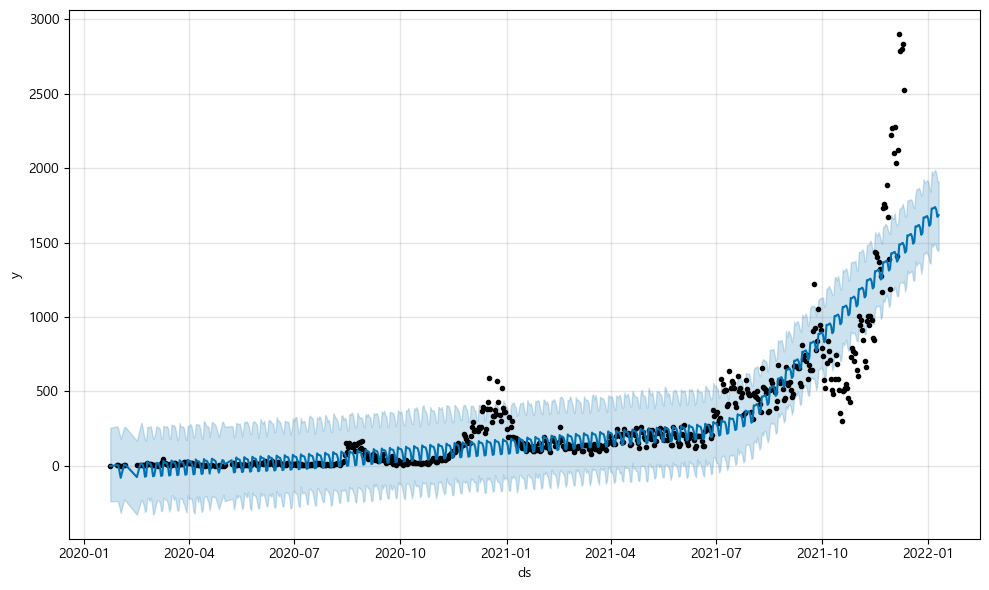

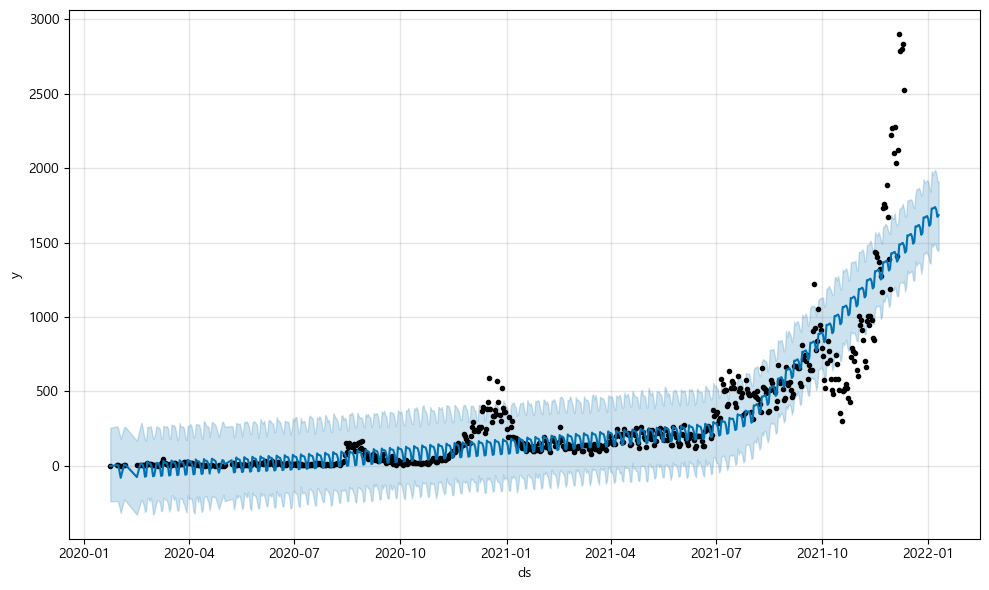

In [29]:
m.plot(forecast)

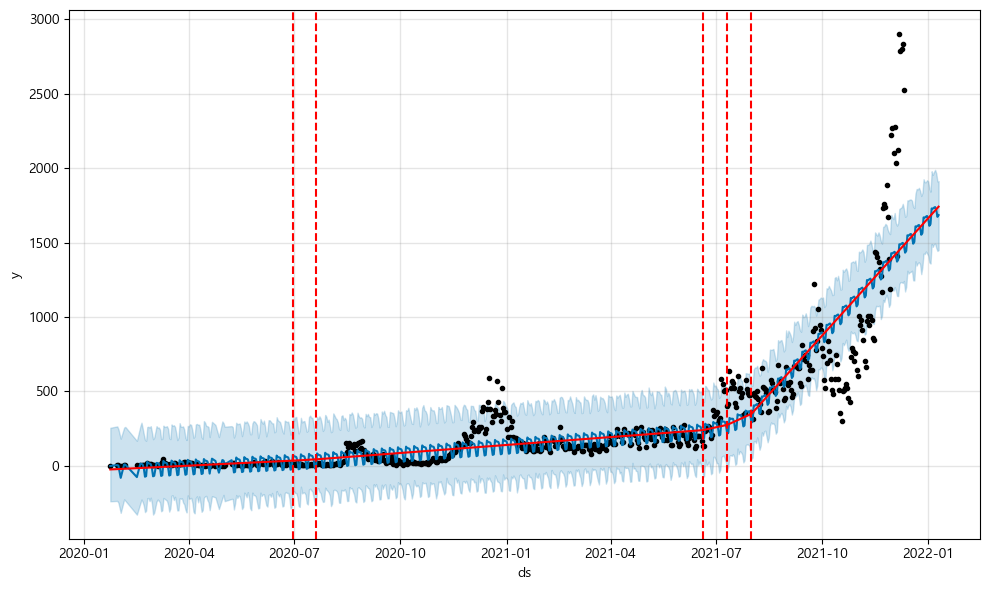

In [30]:
from prophet.plot import add_changepoints_to_plot
fig=m.plot(forecast)
a= add_changepoints_to_plot(fig.gca(),m,forecast)